# Chapter 4. Feature engineering and Represeting data.
# Part 4. Nonlinear Transformations.
Transform feature data into more convenient state. The most convenient state is gaussian distribution so transformation methods should strive for it.

There are 4 handy mathematical transform functions:

log(), exp(), sin(), cos()

## - Preparing datasets (discrete data)

#### Vanilla dataset:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Number of 1st feature value appearances:

Number of 1st feature value appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Feature value')

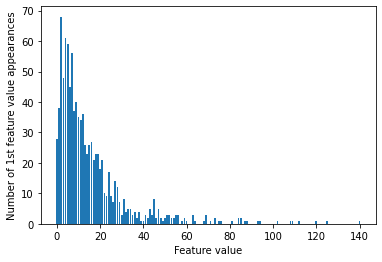

In [26]:
print("Number of 1st feature value appearances:\n{}".format(np.bincount(X[:, 0])))

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of 1st feature value appearances")
plt.xlabel("Feature value")

^ Features distributed with a high contrast of density which is a problem for models. 2nd and 3rd features have the same issue

#### Modified dataset ( log(X+1) ):

In [32]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Feature value')

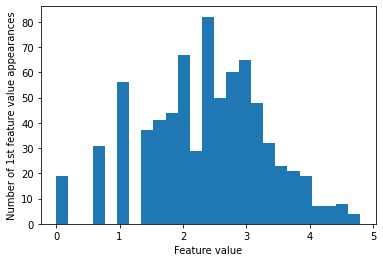

In [34]:
plt.hist(X_train_log[:, 0], bins=25)
plt.ylabel("Number of 1st feature value appearances")
plt.xlabel("Feature value")

^ New dataset seems to be more convenient.

## - Applying Ridge for vanilla and modified dataset

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [37]:
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test accuracy: {:.3f}".format(score))

Test accuracy: 0.622


^ Accuracy is horrible.

In [38]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test accuracy: {:.3f}".format(score))

R-квадрат на тестовом наборе: 0.875


^ Accuracy is much better.

Finding the best transform for da